In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Install gdown for more robust Google Drive downloads
!pip install gdown

file_id = '1Wh4LEXLU0XbgX-daENl5Eyy-U9bENW20' # Your Google Drive file ID

# Construct the download URL for gdown
gdrive_url = f'https://drive.google.com/uc?id={file_id}'

# Use gdown to download the file directly
import gdown
output_filename = 'Community_Crime_Statistics_20240522.csv'
gdown.download(gdrive_url, output_filename, quiet=False)

df = pd.read_csv(output_filename)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1Wh4LEXLU0XbgX-daENl5Eyy-U9bENW20
To: /content/Community_Crime_Statistics_20240522.csv
100%|██████████| 3.20M/3.20M [00:00<00:00, 25.7MB/s]


,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


In [3]:
df.shape

(70661, 5)

In [4]:
df.isnull().sum()

,0
Community,0
Category,0
Crime Count,0
Year,0
Month,0


In [5]:
df.dtypes

,0
Community,object
Category,object
Crime Count,int64
Year,int64
Month,int64


In [6]:
df.describe()

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


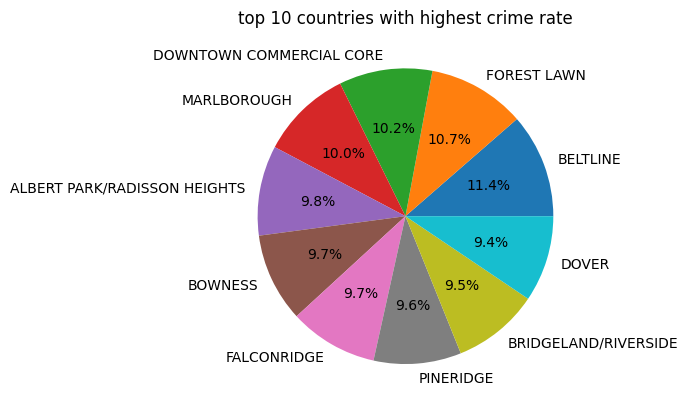

In [7]:
values=df["Community"].value_counts().head(10)
plt.pie(df["Community"].value_counts().head(10) ,labels=values.index ,autopct="%1.1f%%")
plt.title("top 10 countries with highest crime rate")
plt.show()


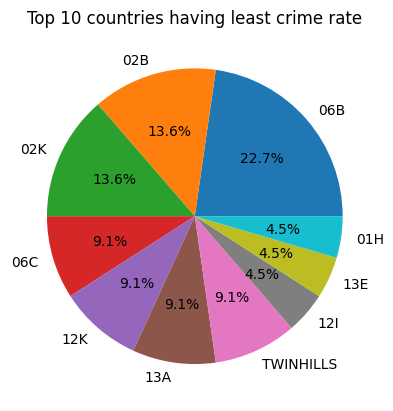

In [ ]:
values=df["Community"].value_counts().tail(10)
plt.pie(df["Community"].value_counts().tail(10) , labels=values.index , autopct="%1.1f%%")
plt.title("Top 10 countries having least crime rate")
plt.show()

In [ ]:
#based on category

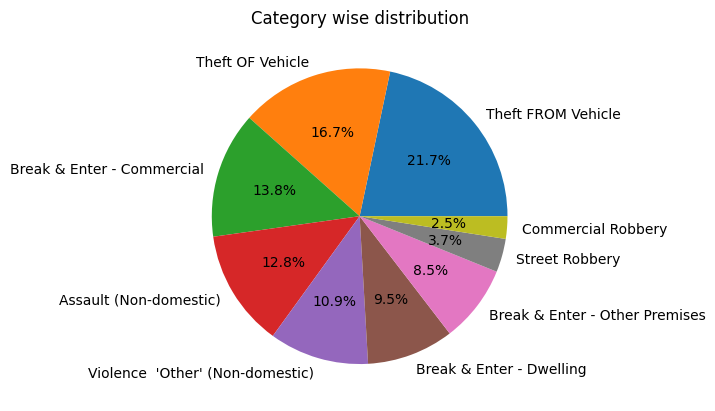

In [ ]:
value=df["Category"].value_counts()
plt.pie(df["Category"].value_counts() , labels=value.index  , autopct="%1.1f%%")
plt.title("Category wise distribution")
plt.show()

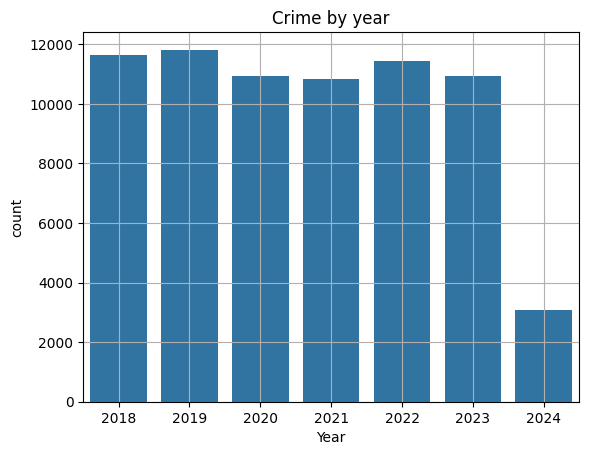

In [ ]:
sns.countplot(x="Year", data=df)
plt.grid()
plt.title("Crime by year")
plt.show()

In [ ]:
# the no.of crime in 2024 are less because we have limited data in 2024 , our data is only upto april 2024

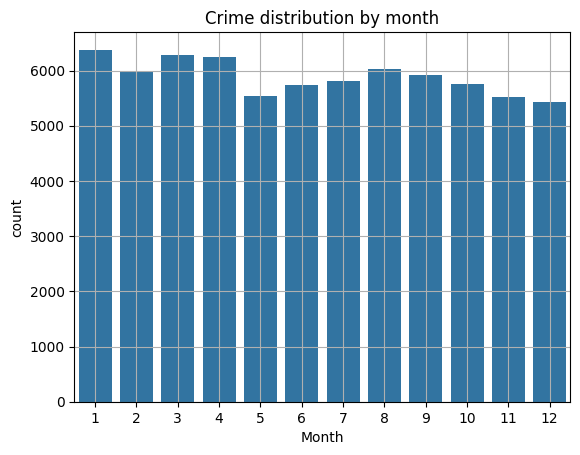

In [ ]:
sns.countplot(x="Month" , data=df  )
plt.title("Crime distribution by month")
plt.grid()
plt.show()

In [ ]:
# highest no.of crimes are happened in the first month. followed by 3rd , followed by 4th month

/tmp/ipython-input-1611266576.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right" , fontsize=5)


<Axes: xlabel='Community', ylabel='count'>

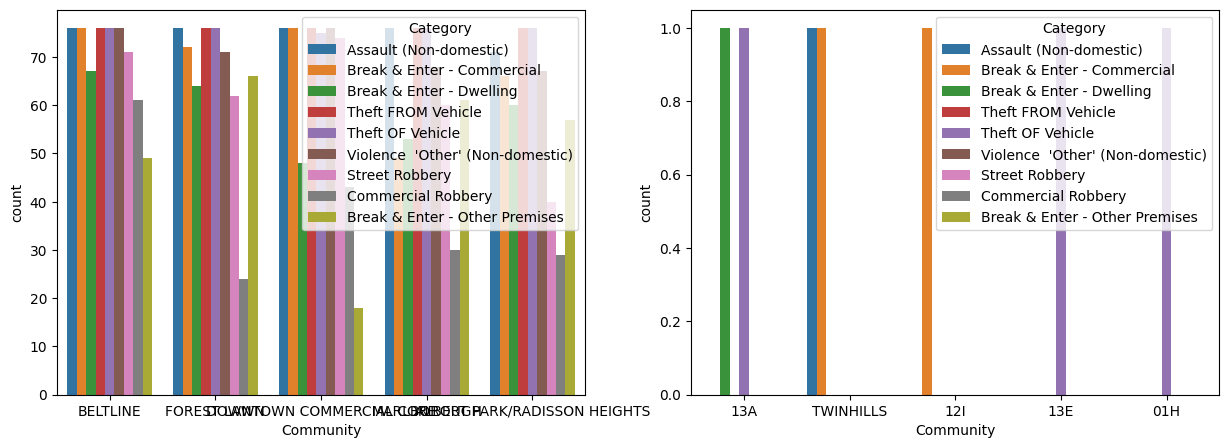

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x="Community" , data=df , hue="Category" , order=df["Community"].value_counts().head(5).index , ax=ax[0])
plt.legend(loc="upper right" , fontsize=5)
sns.countplot(x="Community" , data=df , hue="Category" , order=df["Community"].value_counts().tail(5).index , ax=ax[1])

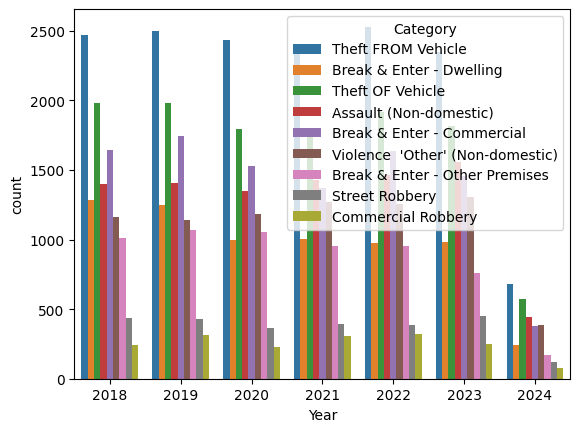

In [ ]:
sns.countplot(x="Year" , data=df , hue="Category")
plt.show()

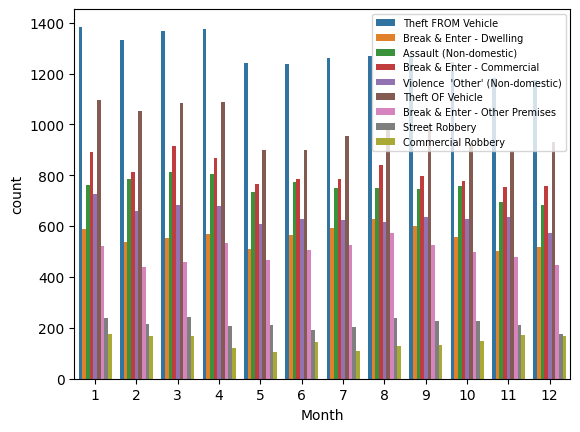

In [ ]:
sns.countplot(x="Month" , data=df , hue="Category")
plt.legend(loc="upper right" , fontsize=7)
plt.show()

In [ ]:
# in all of the months the  category with highest no.of crimes is Theft FROM vehicle

In [ ]:
#data processing 2
# in our data we have community , category , are having dtypes =object we have to encode them

In [8]:
#label encoding
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
df["Community"]=model.fit_transform(df["Community"])
df["Category"]=model.fit_transform(df["Category"])

In [9]:
df.dtypes

,0
Community,int64
Category,int64
Crime Count,int64
Year,int64
Month,int64


In [ ]:
df.head()

,Community,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


In [ ]:
#building neural network

In [ ]:
#data preprocessing

In [ ]:
df.shape

(70661, 5)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler() # Scaler for input features
scaler_y = MinMaxScaler() # Scaler for target 'Crime Count'

X = df[['Community', 'Category', 'Year', 'Month']].values
y = df[['Crime Count']].values

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1,1)) # Scale Crime Count separately

# The original cell's output was X_scaled, so we'll maintain that for continuity if it was important.
X_scaled
data_scaled = np.hstack([X_scaled, y_scaled])

In [11]:
df.shape

(70661, 5)

In [18]:
time_steps = 100

def create_sequences(data, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_steps):
        X_seq.append(data[i:i+time_steps, :])   # all 5 columns
        y_seq.append(data[i+time_steps, -1])    # last column = scaled y
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(data_scaled, time_steps)


In [19]:
train_size = int(len(X_seq) * 0.65)

x_train, x_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test  = y_test.astype('float32')


In [20]:
print(x_train.shape)

(45864, 100, 5)


In [ ]:
#building lstm model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
model=Sequential()
model.add(LSTM(50 , activation="relu" ,input_shape=(time_steps , x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss="mse" , optimizer="adam" , metrics=['mae'])

In [25]:
history=model.fit(x_train , y_train, validation_data=(x_test , y_test) , epochs=10 , batch_size=64 , verbose=1)

Epoch 1/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - loss: 0.0022 - mae: 0.0239 - val_loss: 3.5429e-04 - val_mae: 0.0132
Epoch 2/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - loss: 7.4094e-04 - mae: 0.0164 - val_loss: 3.3249e-04 - val_mae: 0.0135
Epoch 3/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - loss: 5.4166e-04 - mae: 0.0141 - val_loss: 3.1476e-04 - val_mae: 0.0129
Epoch 4/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - loss: 5.1367e-04 - mae: 0.0137 - val_loss: 3.3367e-04 - val_mae: 0.0139
Epoch 5/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - loss: 5.3807e-04 - mae: 0.0137 - val_loss: 2.9875e-04 - val_mae: 0.0126
Epoch 6/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - loss: 5.0016e-04 - mae: 0.0134 - val_loss: 2.8280e-04 - val_mae: 0.0116
Epoch 7/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - loss: 4.9564e-04 - mae: 0.0133 - val_loss: 3.0161e-04 - val_mae: 0.0128
Epoch 8/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - loss: 4.6946e-04 - mae: 0.0129 - val_loss: 2.8307e-0

In [26]:

train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

1434/1434 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step


In [28]:
y_test_real   = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
test_pred_real = scaler_y.inverse_transform(test_predict).ravel()

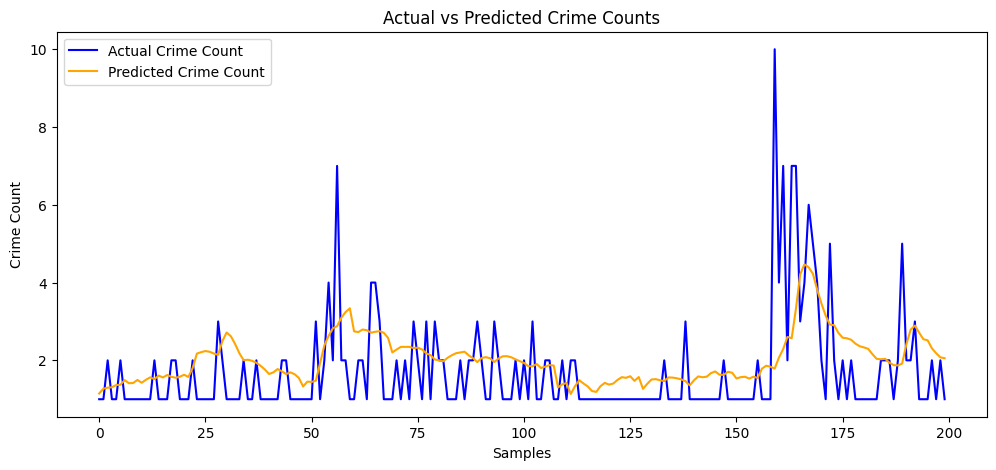

In [29]:
plt.figure(figsize=(12,5))
plt.plot(y_test_real[:200], label='Actual Crime Count', color='blue')
plt.plot(test_pred_real[:200], label='Predicted Crime Count', color='orange')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.show()
